In [1]:
import os
import sys
from collections import defaultdict

sys.path.insert(1, os.path.join(sys.path[0], '..'))


from scheduler.constants import REGION_NAMES, REGION_LOCATIONS
from scheduler.util import load, load_file
from scheduler.plot import Plot
from scheduler.parser import parse_arguments
import matplotlib.pyplot as plt

carbon_intensities = defaultdict(list)
 
dfs = [load(f"../electricity_map/{region}.csv", False) for region in REGION_NAMES]

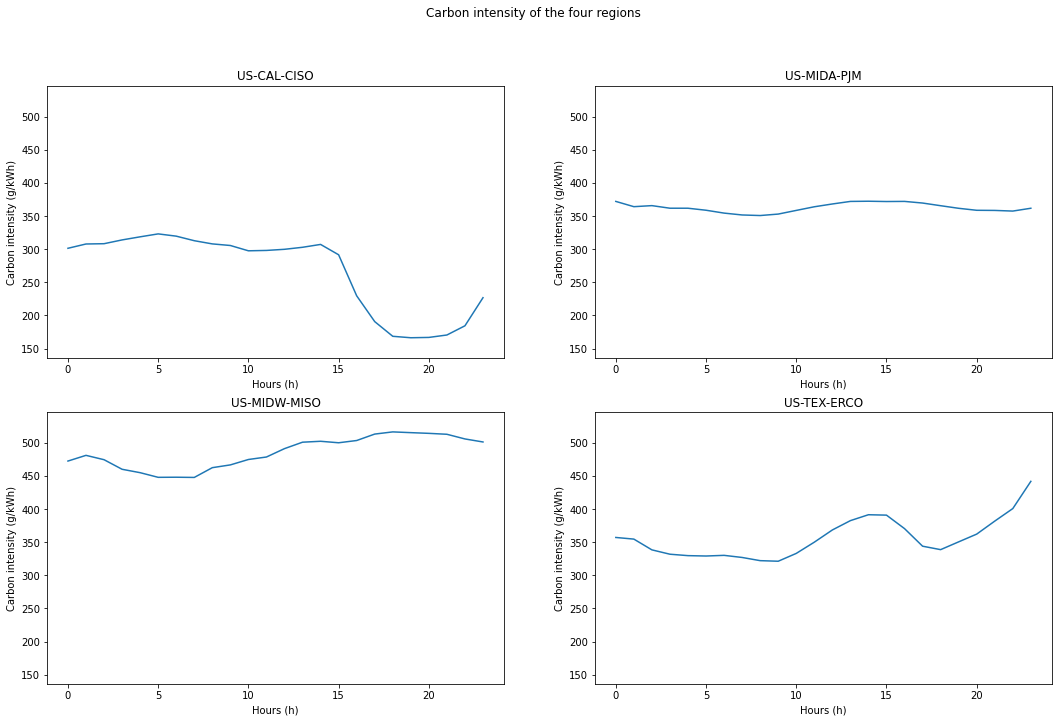

In [15]:
fig = plt.figure(figsize=(18,11))
fig.suptitle("Carbon intensity of the four regions")
min_value, max_value = sys.maxsize, 0
margin = 30

for i in range(len(dfs)):
    df = dfs[i]
    max_value = max(max_value, df["carbon_intensity_avg"].iloc[0:24].max())
    min_value = min(min_value, df["carbon_intensity_avg"].iloc[0:24].min())

max_value += margin
min_value -= margin
for i in range(len(dfs)):
    df = dfs[i]
    ax = plt.subplot(2, 2, i + 1)
    ax.set_title(REGION_NAMES[i])
    ax.set_ylabel("Carbon intensity (g/kWh)")
    ax.set_xlabel("Hours (h)")
    ax.set_ylim(min_value, max_value)
    df["carbon_intensity_avg"].iloc[0:24].plot(ax=ax)

plt.show()

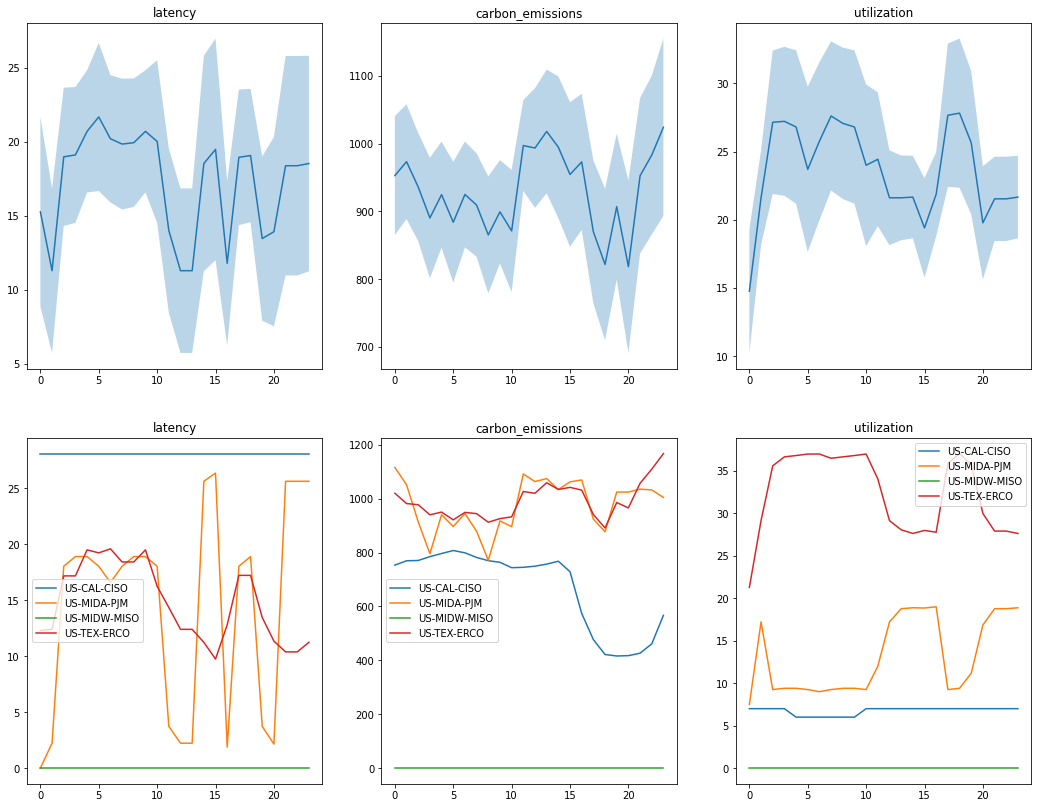

In [3]:

conf = parse_arguments([])
plot = Plot(conf, load_file("../test.csv"))
plot.plot()